# INTRODUCCIÓN A MACHINE LEARNING 

_Información tomada de la clase del profesor Ph.D. Nicolás Avilán Vargas_

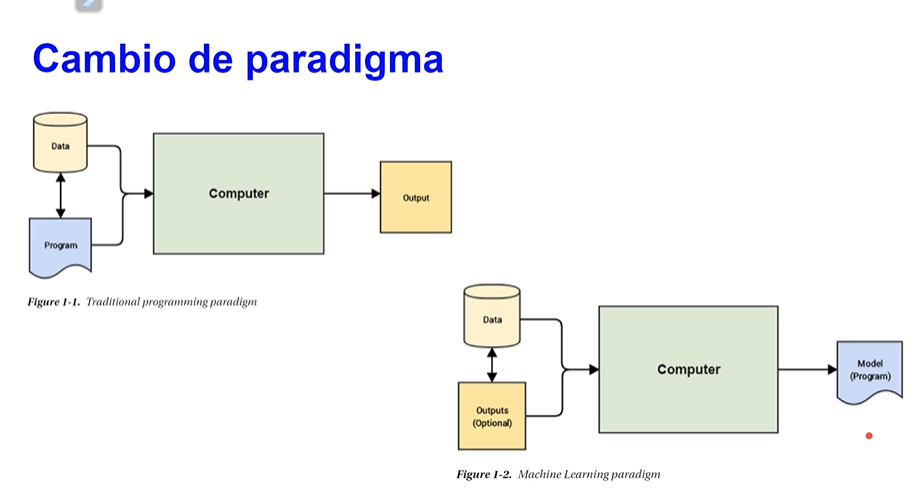

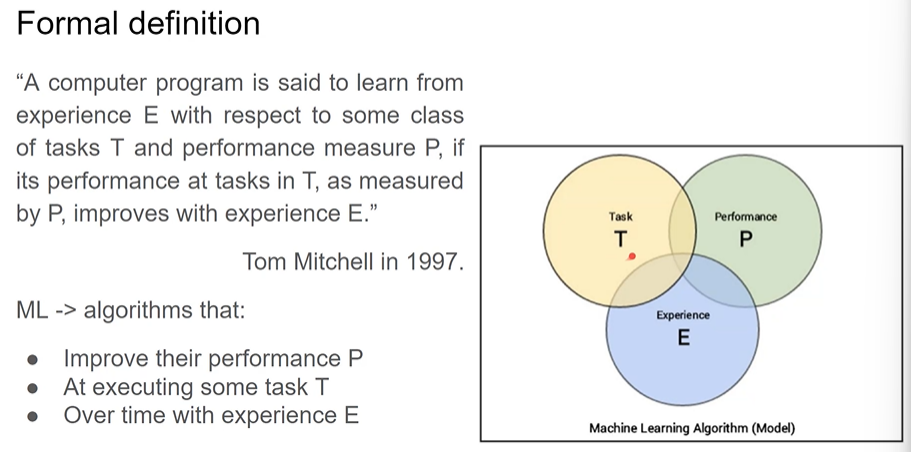

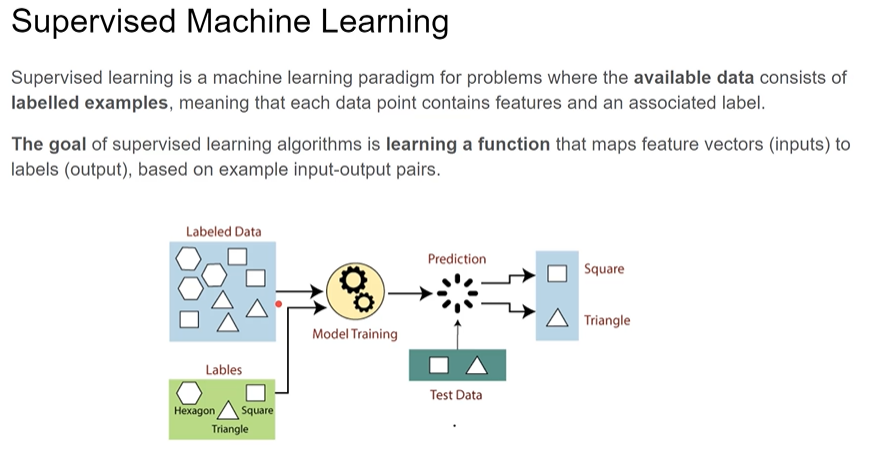

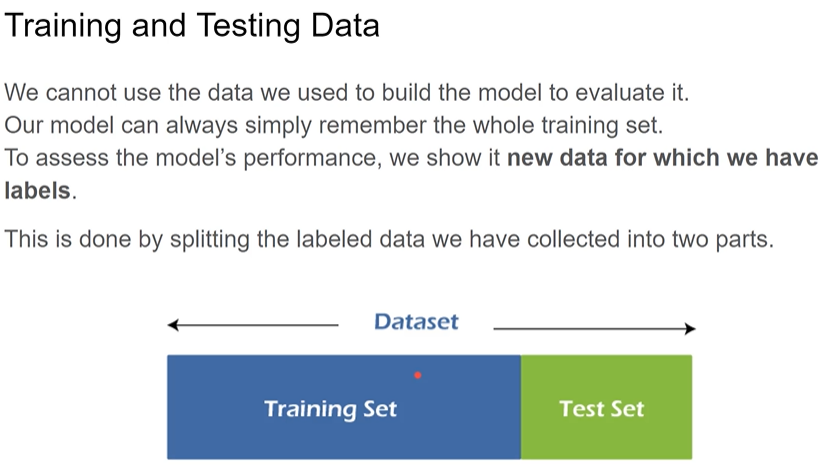

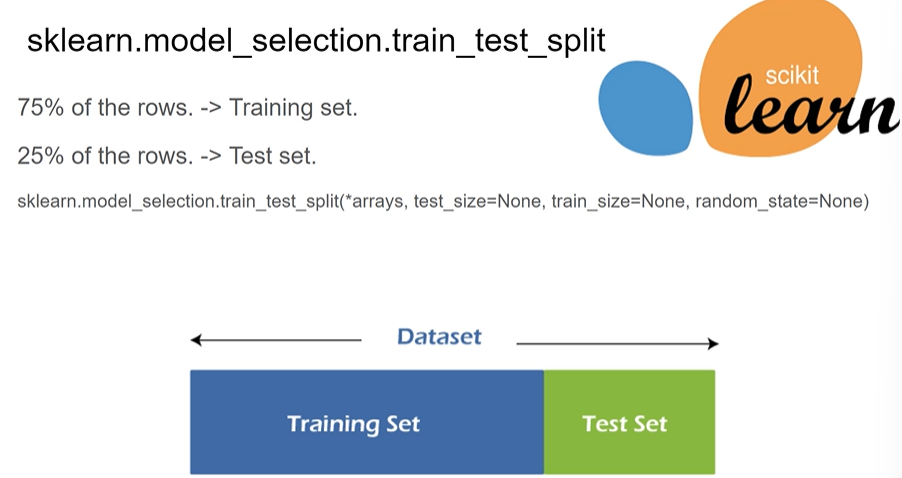

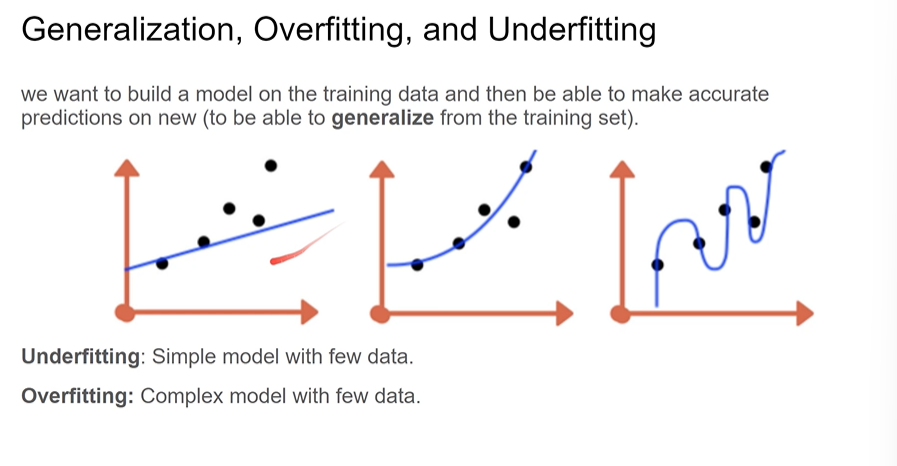

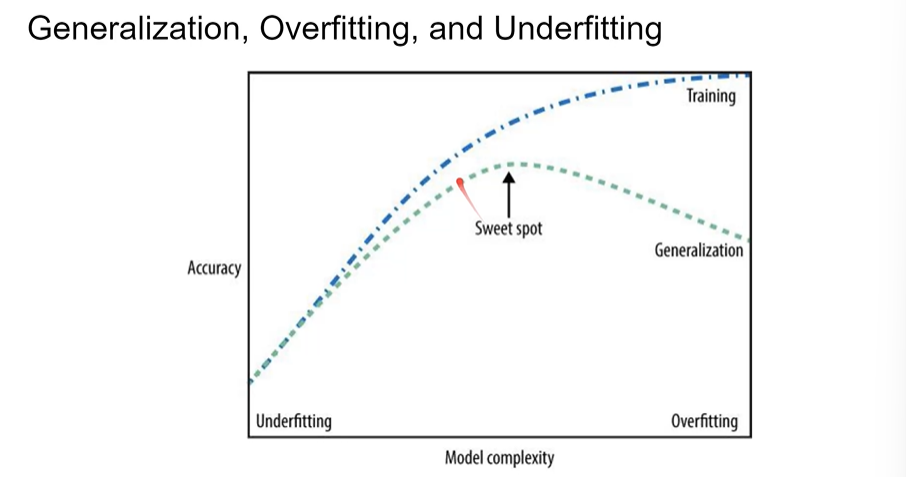

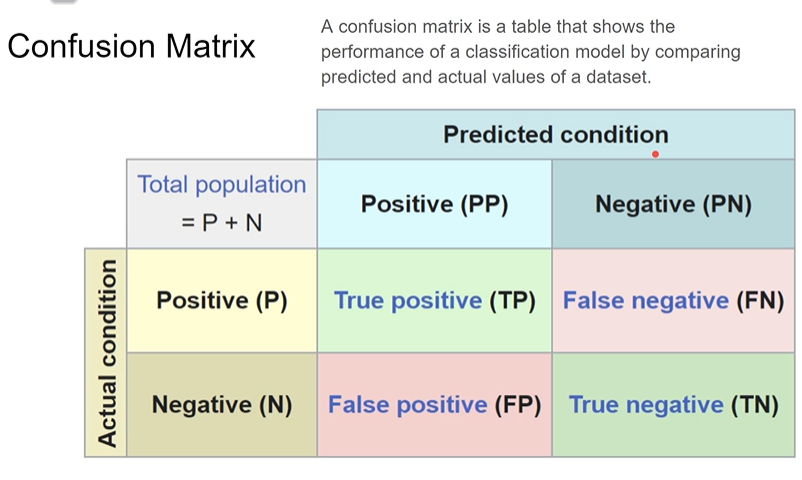

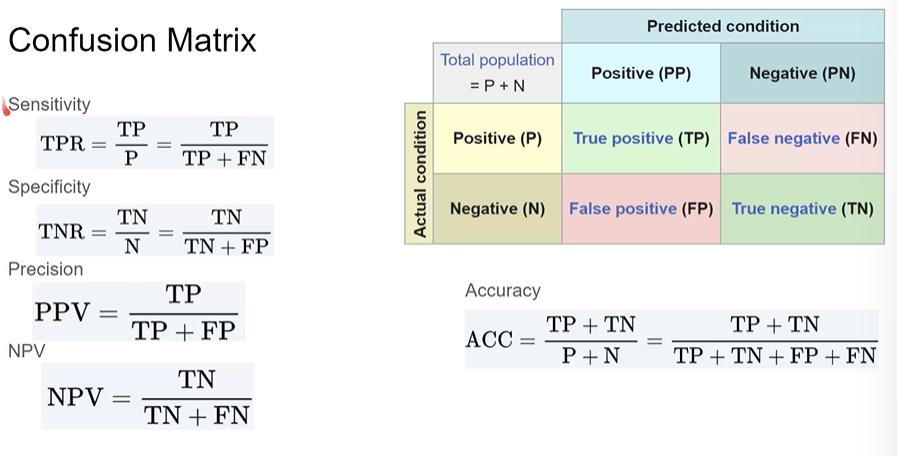

### Implementación de procesos de machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/cancer.csv'
df = pd.read_csv(url)
df.head()

,ID,Tipo,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,...,Radio_WM,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM
0,842302,M,1799,1038,1228,1001,1184,2776,3001,1471,...,2538,1733,1846,2019,1622,6656,7119,2654,4601,1189
1,842517,M,2057,1777,1329,1326,8474,7864,869,7017,...,2499,2341,1588,1956,1238,1866,2416,186,275,8902
2,84300903,M,1969,2125,130,1203,1096,1599,1974,1279,...,2357,2553,1525,1709,1444,4245,4504,243,3613,8758
3,84348301,M,1142,2038,7758,3861,1425,2839,2414,1052,...,1491,265,9887,5677,2098,8663,6869,2575,6638,173
4,84358402,M,2029,1434,1351,1297,1003,1328,198,1043,...,2254,1667,1522,1575,1374,205,4,1625,2364,7678


In [3]:
px.pie(df, df['Tipo']) #(DataFrame, DataFrame.columna)

In [4]:
df.columns

Index(['ID', 'Tipo', 'Radio', 'Textura', 'Perimetro', 'Area', 'Suavidad',
       'Compacidad', 'Concavidad', 'Puntos_Conca', 'Simetria', 'Fractal',
       'Radio_SE', 'Textura_SE', 'Perimetro_SE', 'Area_SE', 'Suavidad_SE',
       'Compacidad_SE', 'Concavidad_SE', 'Puntos_Conca_SE', 'Simetria_SE',
       'Fractal_SE', 'Radio_WM', 'Textura_WM', 'Perimetro_WM', 'Area_WM',
       'Suavidad_WM', 'Compacidad_WM', 'Concavidad_WM', 'Puntos_Conca_WM',
       'Simetria_WM', 'Fractal_WM'],
      dtype='object')

In [5]:
# Tomamos los datos de Perímetro y Compacidad para realizar un gráfico de dispersion

px.scatter(df, x = df.Compacidad, y = df.Perimetro, color = df.Tipo, height=400, width=500)

In [6]:
df.Tipo.value_counts()

Tipo
B    357
M    212
Name: count, dtype: int64

In [7]:
len(df)

569

In [8]:
# Probabilidad de benignas
((df.Tipo.value_counts()[0] / len(df)) * 100).round(2)

62.74

In [9]:
# Probabilidad de benignas
((df.Tipo.value_counts()[1] / len(df)) * 100).round(2)

37.26

Considero células con perímetro mayor a 3500

In [10]:
df[ df.Perimetro > 3500 ]

,ID,Tipo,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,...,Radio_WM,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM
3,84348301,M,1142,2038,7758,3861,1425,2839,2414,1052,...,1491,265,9887,5677,2098,8663,6869,2575,6638,173
5,843786,M,1245,157,8257,4771,1278,17,1578,8089,...,1547,2375,1034,7416,1791,5249,5355,1741,3985,1244
9,84501001,M,1246,2404,8397,4759,1186,2396,2273,8543,...,1509,4068,9765,7114,1853,1058,1105,221,4366,2075
15,84799002,M,1454,2754,9673,6588,1139,1595,1639,7364,...,1746,3713,1241,9432,1678,6577,7026,1712,4218,1341
16,848406,M,1468,2013,9474,6845,9867,72,7395,5259,...,1907,3088,1234,1138,1464,1871,2914,1609,3029,8216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,1459,2268,9639,6571,8473,133,1029,3736,...,1548,2727,1059,7335,1026,3171,3662,1105,2258,8004
559,925291,B,1151,2393,7452,4035,9261,1021,1112,4105,...,1248,3716,8228,4742,1298,2517,363,9653,2112,8732
560,925292,B,1405,2715,9138,6004,9929,1126,4462,4304,...,153,3317,1002,7067,1241,2264,1326,1048,225,8321
561,925311,B,112,2937,7067,386,7449,3558,0,0,...,1192,383,7519,4396,9267,5494,0,0,1566,5905


In [11]:
len(df[ df.Perimetro > 3500 ])

371

In [12]:
df[ df.Perimetro > 3500 ].Tipo.value_counts()

Tipo
B    325
M     46
Name: count, dtype: int64

In [13]:
df[ df.Perimetro > 3500 ].Tipo.value_counts()[0] / len(df[ df.Perimetro > 3500 ])

0.876010781671159

Grafico torta para los dats en los que Perímtro > 3500

In [14]:
px.pie(df[ df.Perimetro > 3500], df[ df.Perimetro > 3500].Tipo)

Grafico torta para los dats en los que Perímtro < 3500

In [15]:
px.pie(df[ df.Perimetro < 3500], df[ df.Perimetro < 3500].Tipo)

### FUNCIÓN DE **ENTROPIA**

Una medida de qué tanto desconocemos el sistema cuando tenemos un cálculo de probabilidad, es decir, una medida de incertidumbre

$$ S = - \sum_{ n=1 }^N p_n \log_2 p_n $$

donde $N$ es el número de estados. $N=2$ en nuestro caso (B/M) y $p_n$ es la probabilidad del éxito en la predicción del estado.

Si se tienen dos estados, la entropía está dada por:

$$ S = - p \log_2 p - ( 1 - p ) \log_2 ( 1 - p) $$


In [16]:
#Función de entropía
def S(p):
    return (-p * np.log2(p) - ( 1 - p)*np.log2(1 - p)).round(3)

In [17]:
# Entropía asociada a la primera predicción  (Todas las células)
S(0.627)

0.953

Entropía asociada a la segunda predicción

In [18]:
# Entropía asociada a la segunda predicción (Considerando las células con perímetro mayor a 3500)
S(0.876)

0.541

Si la entropía es una medida de incertidumbre o de ignorancia del sistema. Quiero que mejores procesos disminuyen el valor de la entropía

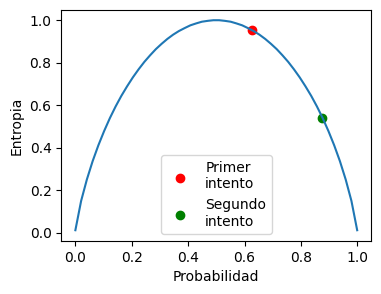

In [19]:
plt.figure(figsize= (4,3))
ε = 1e-3
p = np.linspace(0 + ε, 1 - ε)
plt.plot(p, S(p))
plt.scatter(0.627, S(0.627), color ='red', label= 'Primer\nintento')
plt.scatter(0.876, S(0.876), color ='green', label= 'Segundo\nintento')
plt.xlabel('Probabilidad')
plt.ylabel('Entropia')
plt.legend()
plt.show()

### Construcción del arbol

In [20]:
from sklearn import tree

In [21]:
X = df[[ 'Perimetro', 'Compacidad']].values
X

array([[1228, 2776],
       [1329, 7864],
       [ 130, 1599],
       ...,
       [1083, 1023],
       [1401,  277],
       [4792, 4362]], dtype=int64)

In [22]:
X.shape

(569, 2)

In [23]:
y = df.Tipo.values
y.shape

(569,)

In [24]:
arbol = tree.DecisionTreeClassifier( criterion = 'entropy', min_samples_split= 100)
arbol.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_samples_split=100)

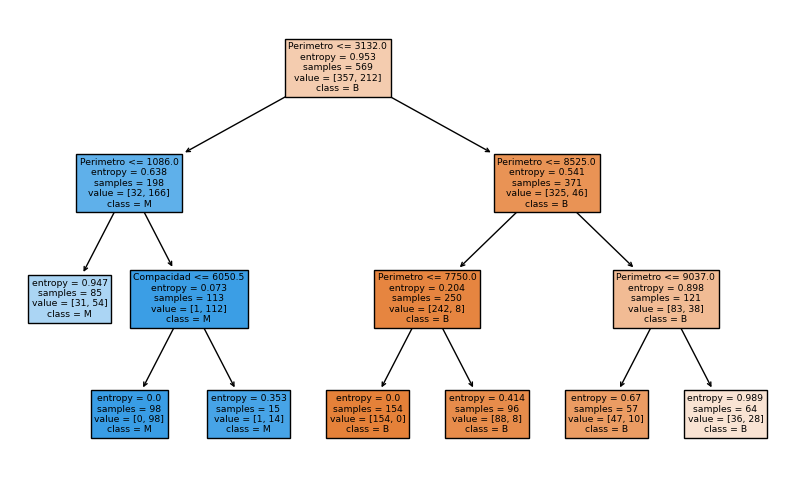

In [25]:
plt.figure(figsize= (10,6))
tree.plot_tree(arbol, feature_names = ['Perimetro', 'Compacidad'], filled = True, class_names= ['B', 'M'])
plt.show()

In [26]:
y_pred = arbol.predict(X)
y_pred[:10]

array(['M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B'], dtype=object)

In [27]:
y[:10]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [28]:
y == y_pred

array([ True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

### Medidas de desempeño

In [29]:
# Porcentaje de acierto en la predicción
np.mean(y == y_pred).round(3) * 100

86.3

In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y, y_pred)
cm

array([[325,  32],
       [ 46, 166]], dtype=int64)

NameError: name 'ConfusionMatrixDisplay' is not defined

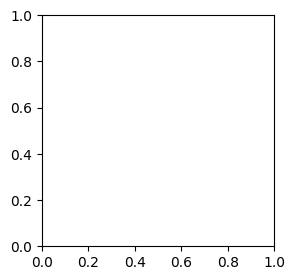

In [34]:
fig, ax = plt.subplots( figsize =  (3,3))
disp = ConfusionMatrixDisplay( confusion_matrix = cm,
                              display_labels = ['B', 'M'] )

disp.plot(ax = ax)
ax.set_xlabel('Predicción')
ax.set_ylabel('Verdadero')
plt.show()

In [33]:
cm[0].sum()

357

* De los 357 buenos, 325 son clasificados como buenos.
* De los 357 buenos, 32 son clasificados como malos.
* De los 212 malas, 166 son clasificados como malos.